In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

**1 частина.
Виконання кластерізації даних датафрейму data_2.csv**

In [ ]:
#  Завантажую таблицю

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/data_2d.csv')
df_1 = pd.DataFrame(df_1, columns=df_1.columns)
df_1

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   0.000000000000000000e+00   199 non-null    float64
 1   -7.687164597386728637e-01  199 non-null    float64
 2   4.608603078297135447e-01   199 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [ ]:
columns=df_1.columns.tolist()
columns


['0.000000000000000000e+00',
 '-7.687164597386728637e-01',
 '4.608603078297135447e-01']

In [ ]:
df_1.max(), df_1.min()

(0.000000000000000000e+00     1.000000
 -7.687164597386728637e-01    4.554605
 4.608603078297135447e-01     5.722027
 dtype: float64,
 0.000000000000000000e+00     0.000000
 -7.687164597386728637e-01   -1.488928
 4.608603078297135447e-01    -1.344141
 dtype: float64)

In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_1)

# Створення DataFrame з масштабованого масиву
scaled_df_1 = pd.DataFrame(scaled_array, columns=df_1.columns)

# Виведення перших п'яти рядків
scaled_df_1.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,-1.005038,0.746805,0.091644
1,-1.005038,-1.608082,-1.093431
2,-1.005038,-0.947987,-0.621677
3,-1.005038,-1.511010,-0.676779
4,-1.005038,0.253876,0.296300


In [ ]:
# Нормалізація даних
norm_array = normalize(scaled_df_1)

# Створення DataFrame з нормалізованого масиву
norm_df_1 = pd.DataFrame(norm_array, columns=df_1.columns)

# Виведення перших п'яти рядків
norm_df_1.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,-0.800524,0.594839,0.072995
1,-0.459136,-0.734627,-0.499517
2,-0.663386,-0.625729,-0.410345
3,-0.518911,-0.780149,-0.349427
4,-0.932211,0.235480,0.274830


In [ ]:
# Розділення вибірки на навчальну і тестову

train_df_1, test_df_1 = train_test_split(norm_df_1, test_size=0.3, random_state=42)
train_df_1.shape, test_df_1.shape


((139, 3), (60, 3))

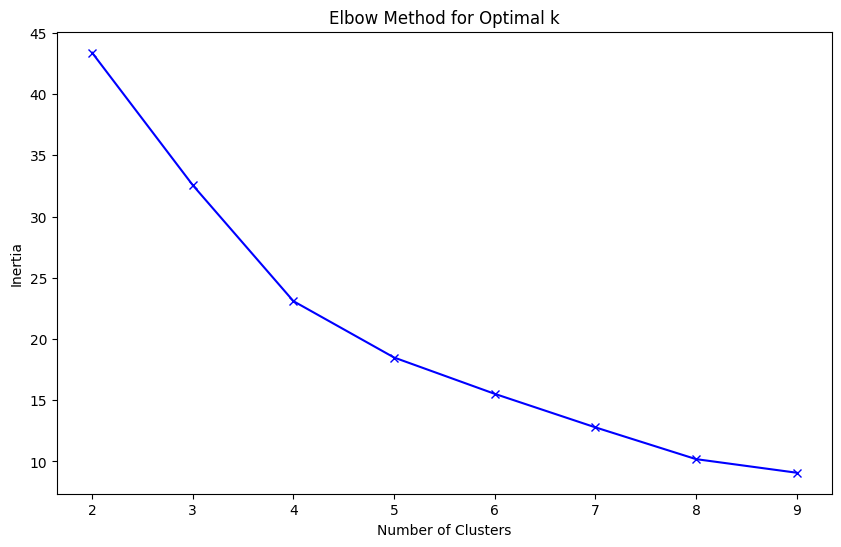

In [ ]:
# Визначаю кількіть кластерів методом "ліктя".


# Визначення кількості кластерів методом "ліктя"
inertias = []

K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, n_init='auto').fit(train_df_1)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Використання KMeans біблітеотеки sklearn
# Вибір кількості кластерів
k = 4
km_1 = KMeans(n_clusters=k, random_state=42)
km_1.fit(train_df_1)

# Додавання колонок з кластерами до DataFrame
train_df_1['cluster'] = km_1.labels_

# Виведення перших п'яти рядків з колонкою кластерів
train_df_1.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01,cluster
140,0.910791,-0.338896,-0.235817,3
31,-0.733254,0.446277,-0.513006,2
12,-0.874987,-0.431904,0.218762,1
35,-0.528763,-0.757293,-0.383298,1
115,0.434490,0.900046,0.033700,0


In [ ]:
# Розподіл даних навчальної вибірки по кластерах (n=2)
clusters = km_1.labels_
print("Clusters:")
clusters

Clusters:


array([3, 2, 1, 1, 0, 1, 1, 0, 3, 1, 0, 3, 1, 3, 0, 2, 0, 2, 3, 1, 1, 1,
       0, 0, 0, 2, 1, 2, 3, 1, 1, 1, 0, 3, 1, 2, 0, 2, 1, 0, 0, 3, 3, 1,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 3, 1, 2, 0, 0, 0, 1, 2, 0, 3, 2, 0,
       1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2,
       1, 3, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 3, 3, 1, 1, 0, 1, 3, 2, 2,
       1, 1, 2, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 3, 3, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 0, 1, 1, 3, 3], dtype=int32)

In [ ]:
#  Координати утворених центроїдів утворених кластерів навачальної вибірки
centroids = km_1.cluster_centers_
print("Centroids coordinates:")
centroids

Centroids coordinates:


array([[ 0.61187902,  0.58912203,  0.41335554],
       [-0.63217039, -0.54828116, -0.38869465],
       [-0.71953524,  0.22435909, -0.41843092],
       [ 0.70735162, -0.24344948,  0.46965832]])

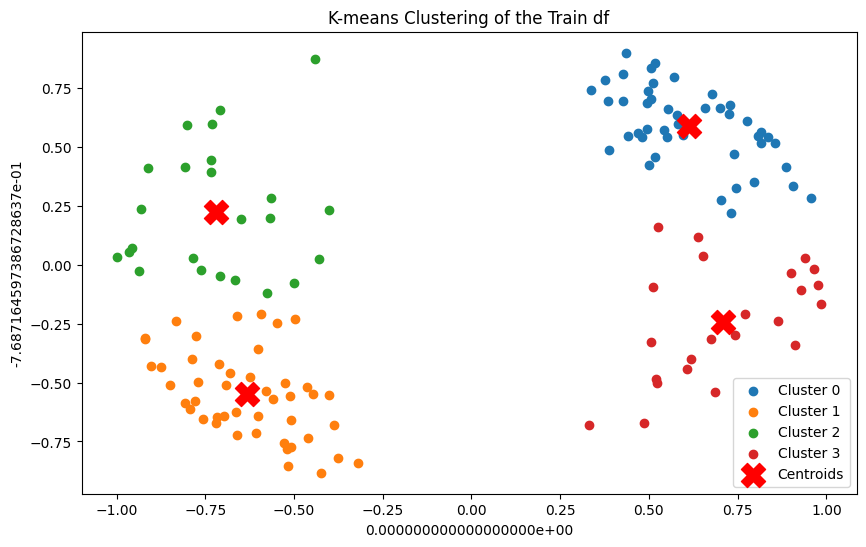

In [ ]:
# Візуалізація утворих кластерів
plt.figure(figsize=(10, 6))
for i in range(k):
    clustered = train_df_1[train_df_1['cluster'] == i]
    plt.scatter(clustered.iloc[:, 0], clustered.iloc[:, 1], label=f'Cluster {i}')

# Додавання центроїдів на діаграму
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

xlabel = train_df_1.columns[0]
ylabel = train_df_1.columns[1]

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('K-means Clustering of the Train df')
plt.legend()
plt.show()

In [ ]:
# Прогнозування кластерів для тестової виборки за допомогою  алгоритму kmeans_df_1
test_clusters = km_1.predict(test_df_1)

# Створення копії тестової виборки з колонкою "cluster"
test_df_1_with_clusters = test_df_1.copy()

# Передбачення кластерів для тестової виборки
test_df_1_with_clusters['cluster'] = test_clusters

# Виведення перших п'яти рядків тестової виборки з мітками кластерів
print("Test Data with Predicted Clusters:")
print(test_df_1_with_clusters.head())



Test Data with Predicted Clusters:
     0.000000000000000000e+00  -7.687164597386728637e-01  \
82                  -0.613153                  -0.367022   
15                  -0.522899                  -0.461437   
111                  0.825130                  -0.559895   
177                  0.742885                   0.272326   
76                  -0.663057                   0.182294   

     4.608603078297135447e-01  cluster  
82                  -0.699527        1  
15                  -0.716696        1  
111                 -0.075353        3  
177                  0.611523        0  
76                  -0.726033        2  


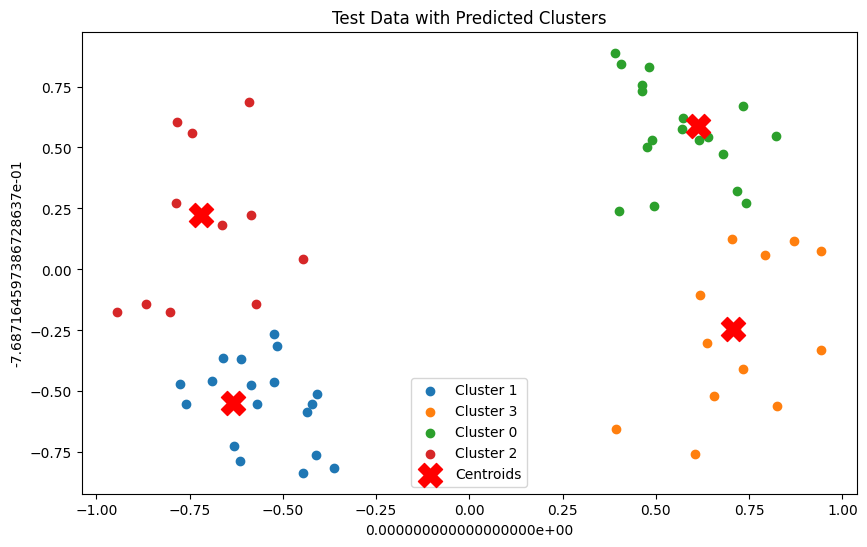

In [ ]:
#  Візуалізаія розподілу даних тестової вибірки в межах передбачених кластерів

# Розділення тестової вибірки на окремі DataFrame за кожен кластер
test_clusters_unique = test_df_1_with_clusters['cluster'].unique()
test_df_clusters = {}
for cluster in test_clusters_unique:
    test_df_clusters[cluster] = test_df_1_with_clusters[test_df_1_with_clusters['cluster'] == cluster]

# Створення графіку
plt.figure(figsize=(10, 6))

# Відображення кожного кластера окремо з використанням різних кольорів
for cluster, df_cluster in test_df_clusters.items():
    plt.scatter(df_cluster.iloc[:, 0], df_cluster.iloc[:, 1], label=f'Cluster {cluster}')

# Додавання центроїдів навчальної вибірки
plt.scatter(km_1.cluster_centers_[:, 0], km_1.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

# Підписи осей
plt.xlabel(test_df_1.columns[0])
plt.ylabel(test_df_1.columns[1])

# Заголовок графіку
plt.title('Test Data with Predicted Clusters')

# Легенда
plt.legend()

# Відображення графіку
plt.show()


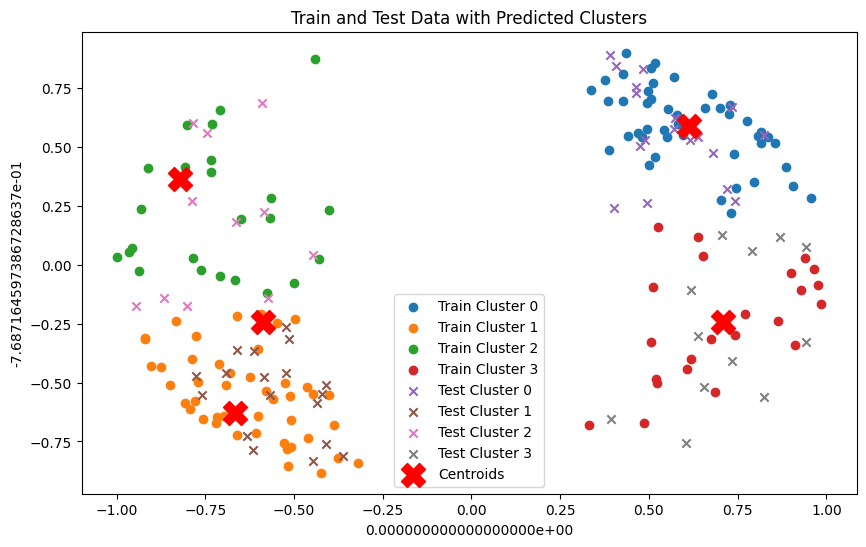

In [ ]:
# Створення графіку, на якому відображені навчльна і тестова вибірки в межах передбачених кластерів
plt.figure(figsize=(10, 6))

# Відображення навчальної вибірки з використанням різних кольорів для кожного кластера
for cluster in range(k):
    plt.scatter(train_df_1[train_df_1['cluster'] == cluster].iloc[:, 0],
                train_df_1[train_df_1['cluster'] == cluster].iloc[:, 1],
                label=f'Train Cluster {cluster}', marker='o')

# Відображення тестової вибірки з використанням різних кольорів для кожного кластера
for cluster in range(k):
    plt.scatter(test_df_1_with_clusters[test_df_1_with_clusters['cluster'] == cluster].iloc[:, 0],
                test_df_1_with_clusters[test_df_1_with_clusters['cluster'] == cluster].iloc[:, 1],
                label=f'Test Cluster {cluster}', marker='x')

# Додавання центроїдів навчальної вибірки
plt.scatter(kmeans_df_1.cluster_centers_[:, 0], kmeans_df_1.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

# Підписи осей
plt.xlabel(train_df_1.columns[0])
plt.ylabel(train_df_1.columns[1])

# Заголовок графіку
plt.title('Train and Test Data with Predicted Clusters')

# Легенда
plt.legend()

# Відображення графіку
plt.show()


**ВИСНОВОК:
** Дані датафрейму було нормалізовано  і розідено на тестову і навчальну вибірки. Методом ліктя визнаечно оптимальну кількість кластерів: 4. За допомогою алгоритму KMeans розділено датафрейм на 4 кластери, які відобажено на точковій діаграмі. Останні діаграма показує потрапляння даних тестової вибірки в межі утворених навчальних кластерів.

**2 частина.
Виконання кластерізації даних датафрейму mnist.csv**

In [ ]:
#  Завантажую таблицю

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/data_2/mnist.csv')
df_2 = pd.DataFrame(df_2, columns=df_2.columns)
df_2

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2.info(), df_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 3.0 MB


(None, (499, 785))

In [ ]:
columns=df_2.columns.tolist()
columns[0:10]


['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8']

In [ ]:
df_2.max()

7        9
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64

In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_2)

# Створення DataFrame з масштабованого масиву
scaled_df_2 = pd.DataFrame(scaled_array, columns=df_2.columns)

# Виведення перших п'яти рядків
scaled_df_2.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,-0.826293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044811,-0.044811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.174536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044811,-0.044811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.522779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044811,-0.044811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.129806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044811,-0.044811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.174536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.044811,-0.044811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Нормалізація даних
norm_array = normalize(scaled_df_2)

# Створення DataFrame з нормалізованого масиву
norm_df_2 = pd.DataFrame(norm_array, columns=df_2.columns)

# Виведення перших п'яти рядків
norm_df_2.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,-0.013835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000750,-0.000750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.082458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.003146,-0.003146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.071907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002116,-0.002116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.007742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002673,-0.002673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.080058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.003054,-0.003054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**PCA аналіз**

In [430]:
components = 2
pca_df_2 = PCA(n_components=components)
pca_df_2.fit(norm_df_2)



PCA(n_components=2)

In [431]:
reduced_df_2= pca_df_2.fit_transform(norm_df_2)
reduced_df_2[0:5]

array([[-0.03972617, -0.21253266],
       [ 0.65447653, -0.15678465],
       [-0.43884872, -0.27147387],
       [-0.30568275,  0.32030323],
       [ 0.64879052, -0.12470171]])

In [ ]:
# Візуалізація результатів РСА

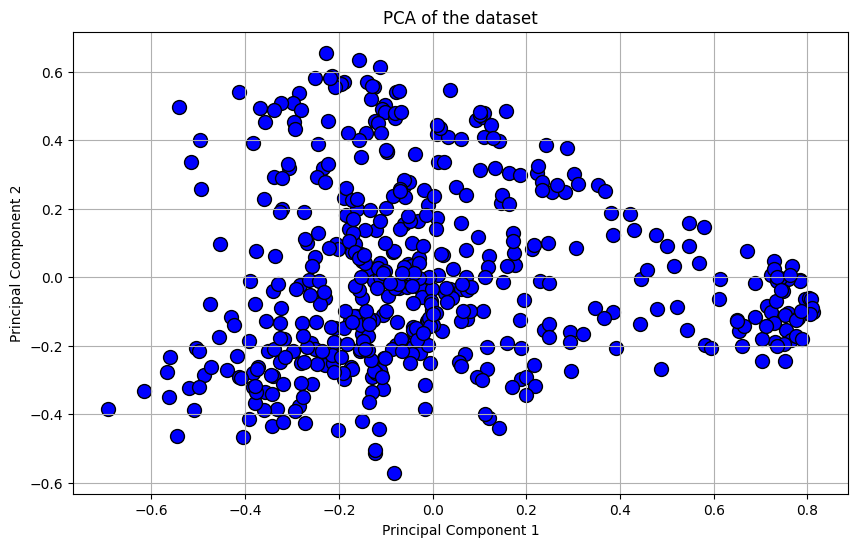

In [432]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df_2[:, 0], reduced_df_2[:, 1], c='blue', edgecolor='k', s=100)
plt.title('PCA of the dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [442]:
# Виведення найбільшого внеску для кожної компоненти (з двох)
# Створення датафрейму для збереження результатів PCA
reduced_df_2 = pd.DataFrame(reduced_df_2, columns=['PC1', 'PC2'])

# Виведення найбільшого внеску для кожної компоненти
components = pca.components_

print("Principal Component Analysis (PCA) Summary:")
for i in range(components.shape[0]):
    index = np.argmax(np.abs(components[i]))
    max_contribution = components[i][index]
    column_name = norm_df_2.columns[index]
    print(f"Principal Component {i+1}:")
    print(f"  Maximum contribution: {max_contribution:.2f} from column '{column_name}'")


Principal Component Analysis (PCA) Summary:
Principal Component 1:
  Maximum contribution: 0.10 from column '0.273'
Principal Component 2:
  Maximum contribution: -0.12 from column '0.155'


In [446]:
reduced_df_2.head()

,PC1,PC2
0,-0.039726,-0.212533
1,0.654477,-0.156785
2,-0.438849,-0.271474
3,-0.305683,0.320303
4,0.648791,-0.124702


In [449]:
reduced_df_2.info (), reduced_df_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     499 non-null    float64
 1   PC2     499 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


(None, (499, 2))

In [450]:
# Розділення вибірки на навчальну і тестову

train_df_2, test_df_2 = train_test_split(reduced_df_2, test_size=0.3, random_state=42)
train_df_2.shape, test_df_2.shape


((349, 2), (150, 2))

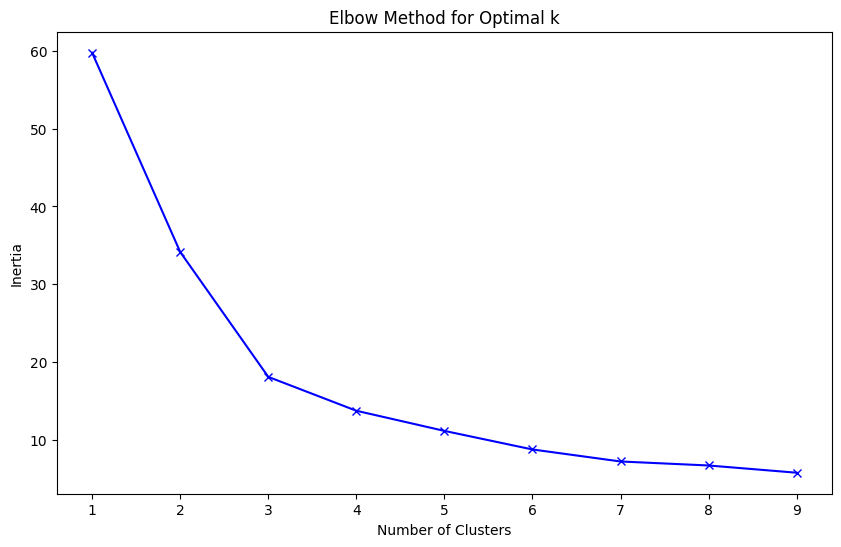

In [451]:
# Визначаю кількіть кластерів методом "ліктя".


# Визначення кількості кластерів методом "ліктя"
inertias = []

K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, n_init='auto').fit(train_df_2)
    inertias.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [452]:
# Використання KMeans біблітеотеки sklearn
# Виходячи зі схеми вище визначаю кількість кластерів як 3.
k = 3
km_2 = KMeans(n_clusters=k, random_state=42)
km_2.fit(train_df_2)

# Додавання колонок з кластерами до DataFrame
train_df_2['cluster'] = km_2.labels_

# Виведення перших п'яти рядків з колонкою кластерів
train_df_2.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PC1,PC2,cluster
461,-0.418263,-0.230819,0
356,0.734851,-0.000221,2
3,-0.305683,0.320303,1
399,-0.276334,-0.350907,0
380,-0.028519,0.040693,0


In [453]:
# Розподіл даних навчальної вибірки по кластерах (n=3)
clusters = km_2.labels_
print("Clusters:")
clusters

Clusters:


array([0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0,

In [454]:
#  Координати утворених центроїдів утворених кластерів навачальної вибірки
centroids = km_2.cluster_centers_
print("Centroids coordinates:")
centroids

Centroids coordinates:


array([[-0.15596892, -0.15972302],
       [-0.04877556,  0.32832096],
       [ 0.57532255, -0.06668974]])

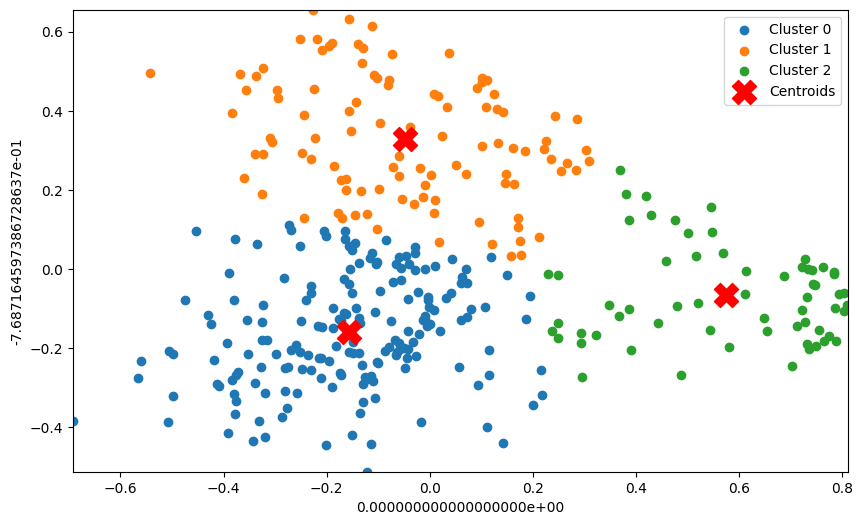

In [455]:
plt.figure(figsize=(10, 6))

# Відображення кожного кластера
for i in range(k):
    clustered = train_df_2[train_df_2['cluster'] == i]
    plt.scatter(clustered.iloc[:, 0], clustered.iloc[:, 1], label=f'Cluster {i}')

# Додавання центроїдів на діаграму
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Підписи осей
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Встановлення меж вертикальної осі
# Замість фіксованих межів, використовуйте мінімальне і максимальне значення з ваших даних
plt.xlim(train_df_2.iloc[:, 0].min(), train_df_2.iloc[:, 0].max())
plt.ylim(train_df_2.iloc[:, 1].min(), train_df_2.iloc[:, 1].max())

# Додавання легенди
plt.legend()

# Відображення графіку
plt.show()


In [456]:
# Прогнозування кластерів для тестової виборки за допомогою  алгоритму km_2
test_clust = km_2.predict(test_df_2)

# Створення копії тестової виборки з колонкою "cluster"
test_df_2_with_clust = test_df_2.copy()

# Передбачення кластерів для тестової виборки
test_df_2_with_clust['cluster'] = test_clust

# Виведення перших п'яти рядків тестової виборки з мітками кластерів
print("Test Data with Predicted Clusters:")
test_df_2_with_clust.head()



Test Data with Predicted Clusters:


,PC1,PC2,cluster
460,-0.264662,-0.009234,0
73,0.758707,-0.103459,2
231,-0.210360,-0.189582,0
175,0.752653,-0.110607,2
237,-0.281893,0.487171,1


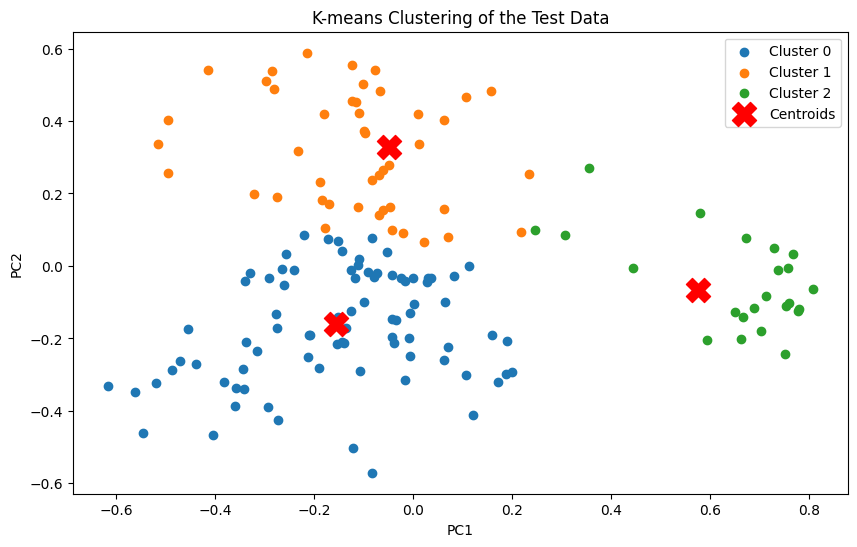

In [461]:
# Візуалізація утворених кластерів для тестової вибірки
plt.figure(figsize=(10, 6))

# Відображення кожного кластера
for i in range(km_2.n_clusters):
    clustered = test_df_2_with_clust[test_df_2_with_clust['cluster'] == i]
    plt.scatter(clustered.iloc[:, 0], clustered.iloc[:, 1], label=f'Cluster {i}')

# Додавання центроїдів на діаграму
centroids = km_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Встановлення міток осей
xlabel = test_df_2.columns[0]
ylabel = test_df_2.columns[1]

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('K-means Clustering of the Test Data')
plt.legend()
plt.show()

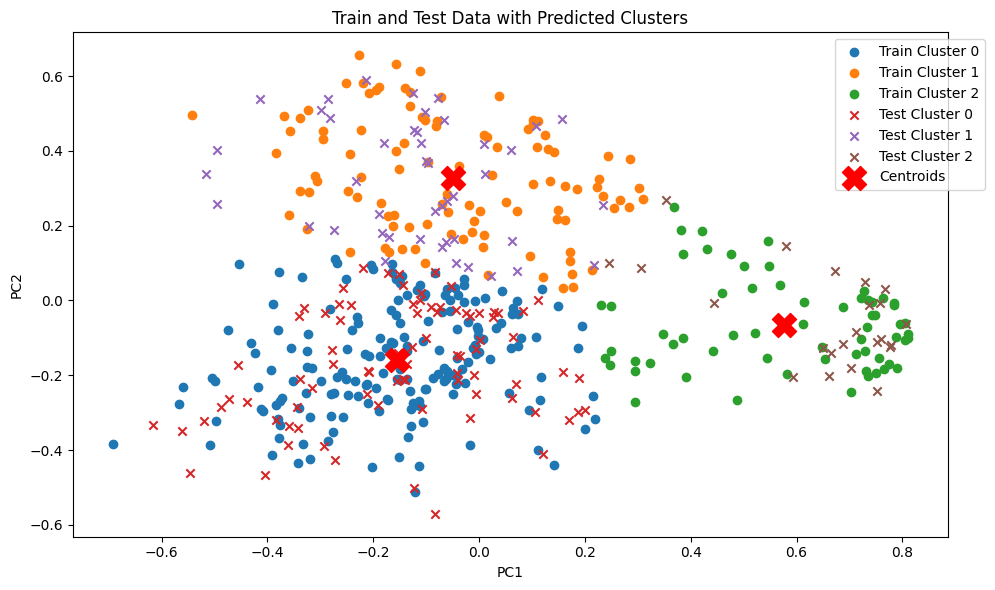

In [466]:
import matplotlib.pyplot as plt

# Створення графіку, на якому відображені навчальна і тестова вибірки в межах передбачених кластерів
plt.figure(figsize=(10, 6))

# Відображення навчальної вибірки з використанням різних кольорів для кожного кластера
for cluster in range(km_2.n_clusters):
    plt.scatter(train_df_2[train_df_2['cluster'] == cluster].iloc[:, 0],
                train_df_2[train_df_2['cluster'] == cluster].iloc[:, 1],
                label=f'Train Cluster {cluster}', marker='o')

# Відображення тестової вибірки з використанням різних кольорів для кожного кластера
for cluster in range(km_2.n_clusters):
    plt.scatter(test_df_2_with_clust[test_df_2_with_clust['cluster'] == cluster].iloc[:, 0],
                test_df_2_with_clust[test_df_2_with_clust['cluster'] == cluster].iloc[:, 1],
                label=f'Test Cluster {cluster}', marker='x')

# Додавання центроїдів навчальної вибірки
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

# Підписи осей
plt.xlabel(train_df_2.columns[0])
plt.ylabel(train_df_2.columns[1])

# Заголовок графіку
plt.title('Train and Test Data with Predicted Clusters')

# Легенда
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))

# Відображення графіку
plt.tight_layout()
plt.show()


**ВИСНОВОК:
** Дані датафрейму було нормалізовано, зменшено розмірність з алгоритмом РСА. Далі розідила на тестову і навчальну вибірки. Методом ліктя визначила оптимальну кількість кластерів: 3. За допомогою алгоритму KMeans розділила датафрейм на 3 кластери, які відобажено на точковій діаграмі. Здійснила передбачення точності потрапляння тестової вибірки у встановлені класи. На останній скаттерграмі показала обидві вибірки, на якій видно, що тестові дані потрапляють в зони передбачених кластерів.